<a href="https://colab.research.google.com/github/aimazin/Cost_South_African_Variant_to_UK/blob/main/The_Cost_of_the_South_African_Variant_on_the_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# The Cost of the South African Variant on the UK (For possible usage in other Countries and Fields) 

In this paper I shall try to estimate the cost of the South African Variant on the Uk using a Currency perspective and using Fourier Series to create Paulings water suppression equation in order to wipe this slate clean of the blythe.

I will also use machine learning technics to show that the discepancy is understood, and the proeed to the Fourier then to Other possble uses.

importing dependencies

In [106]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
 

### we use GBP/USD because at the time the US was very tight in terms of letting people into their country hence no affect by the South African Variant. Hence a stable counter part to judge the effects of the Variant on the UK.

In [107]:
df=yf.download('GBPUSD=X',start='2020-12-01',end='2022-12-01',interval='1d')[['Open','Close']]
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2020-12-01,1.333725,1.333689
2020-12-02,1.342228,1.342264
2020-12-03,1.337095,1.337077
2020-12-04,1.345261,1.345497
2020-12-07,1.341562,1.341742


In [108]:
class Reim():
  """Reimann interpretation of dealing with price data
  where a change in data is a bridge that  one will cross
  once one get there"""
  def fit(self,X,y,n=1):
    self.X=X
    exX=np.log(X)
    exy=np.log(y)
    self.w=np.polyfit(exX,exy,n)
  def predict(self,X,y,show=False):
    """y=exp(log(y))=exp(exy)=exp(w1*exX+w0)=exp(w1*log(X)+w0)=Xexp(w1)exp(w0/X)=Xexp(w1+w0/X)"""
    y_hat=(X * np.exp(np.sum(self.w[0]) + (self.w[0] / X))) / (4.54 * ((self.w[1]) * np.ones(len(X)) + ((self.w[0]) * np.ones(len(X))) / (X * np.ones(len(X)))) ** .5) #- diff * np.ones(len(X))
     
    #y_hat=np.exp((np.sum(self.w[0])*(np.ones(len(X)))+(self.w[0])*(np.ones(len(X))/(X))*(np.ones(len(X)))))*(X)/(4.54*((self.w[1])*(np.ones(len(X)))+((self.w[0])*(np.ones(len(X)))/((X)*(np.ones(len(X))))))**.5)
    #y_hat=np.exp((np.sum(self.w[0])*(np.ones(len(X)))+(self.w[0])*(np.ones(len(X))/(X))*(np.ones(len(X)))))*(X)/(np.pi*((self.w[1])*(np.ones(len(X)))+((self.w[0])*(np.ones(len(X)))/((X)*(np.ones(len(X))))))**.125)
    if show:
      plt.figure()
      plt.scatter(range(len(X)),y)
      plt.plot(range(len(X)),y_hat, color='magenta')
      plt.plot(range(len(X)),np.exp(self.w[0]*(np.ones(len(X)))), color='green')
      plt.plot(range(len(X)),((np.mean(self.X)-np.std(self.X))*(np.ones(len(X)))), color='yellow')
      plt.show()
    return y_hat


In [109]:
X=df.Open[0:150]
y=df.Close[0:150]
X1=df.Open[150:]
y1=df.Close[150:]

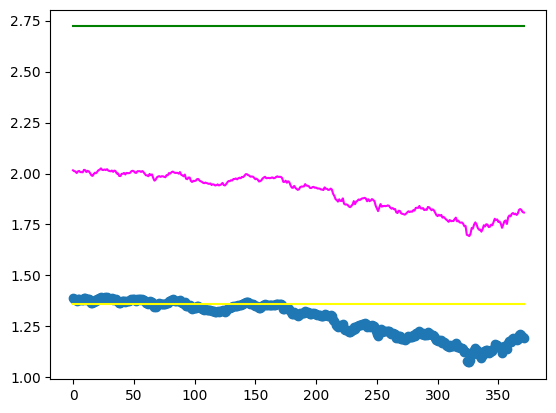

In [110]:
r=Reim()

r.fit(X,y)
y_hat=r.predict(X1,y1,show=True)

In [111]:
y_hat

Date
2021-06-29    2.015672
2021-06-30    2.011438
2021-07-01    2.009839
2021-07-02    2.002189
2021-07-05    2.010033
                ...   
2022-11-24    1.822132
2022-11-25    1.825351
2022-11-28    1.820319
2022-11-29    1.810505
2022-11-30    1.808570
Name: Open, Length: 372, dtype: float64

### The following is number is the treshold at which they should have taken heed and the second is the confidence



In [112]:
diff = y_hat[0]-y1[0]

In [113]:
class Reim():
  """Reimann interpretation of dealing with price data
  where a change in data is a bridge that  one will cross
  once one get there"""
  def fit(self,X,y,n=1):
    self.X=X
    exX=np.exp(X)
    exy=np.exp(y)
    self.w=np.polyfit(exX,exy,n)
  def predict(self,X,y,diff,show=False):
    y_hat=np.array([(X * np.exp(np.sum(self.w[0]) + (self.w[0] / X))) / (4.54 * ((self.w[1]) * np.ones(len(X)) + ((self.w[0]) * np.ones(len(X))) / (X * np.ones(len(X)))) ** .5) - diff * np.ones(len(X)),((self.w[1]) * np.ones(len(X))),((self.w[0]) * np.ones(len(X)))])

    if show:
        plt.figure()
        plt.scatter(range(len(X)),y)
        plt.plot(range(len(X)),y_hat[0,:], color='magenta')
        plt.plot(range(len(X)),(np.max(X)*(np.ones(len(X)))), color='black')
        plt.plot(range(len(X)),(np.min(X)*(np.ones(len(X)))), color='red')
        plt.plot(range(len(X)),((np.max(self.X)-(self.w[0]))*(np.ones(len(X)))), color='cyan')
        plt.plot(range(len(X)),((np.mean(self.X)-np.std(self.X))*(np.ones(len(X)))), color='yellow')
        plt.show()
    return y_hat

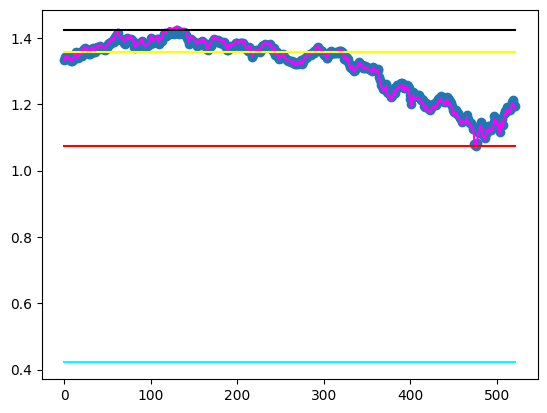

In [114]:
r=Reim()
r.fit(X,y)
y_hat=r.predict(df.Open,df.Close, diff ,show=True)

In [115]:
print((r.w[0]),(r.w[1]),np.std(X))

1.0012296005408146 -0.004831285661090805 0.02333549571201979


In [116]:
print('stdactual :',y1[-60:].std(),' stdpred :',y_hat[0,-60:].std(),' sdtdiff :',np.abs(df.Close-y_hat[0,:]).mean())
print('actual :',list(y1[-5:]),'\n' , 'pred :',y_hat[0,-5:])

stdactual : 0.0328651418449661  stdpred : 0.031595915951068525  sdtdiff : 0.005270308078651885
actual : [1.2073503732681274, 1.2113430500030518, 1.2054728269577026, 1.1960291862487793, 1.1946860551834106] 
 pred : [1.19947491 1.20271524 1.19764914 1.18776909 1.18582101]


In [117]:
df.describe()

,Open,Close
count,522.000000,522.000000
mean,1.312090,1.312091
std,0.087553,0.087563
min,1.072846,1.072754
25%,1.235430,1.235716
50%,1.349865,1.349978
75%,1.377932,1.377966
max,1.422758,1.422678


According to the site https://www.macrotrends.net/countries/GBR/united-kingdom/gdp-gross-domestic-product
the British Economy was worth: $2,704.61B

In [118]:
print('in £B :',2704.61/1.22)

in £B : 2216.893442622951


### Fourier Series Integral with Pauling correction for water suppression

9L = I1+I2, [Iii/2=0=I2]. integral(L/9) = L = I1+I2/4.5pi(m-c)exp(2pix(m-c)/L) = cos(L/2pi(m-c)x)*(exp(pix(m-c)/L))/(4.5pi(m-c)) where x=9, L=3.7, m=N=mean, c=std

In [152]:
x=9
L=4.5 
m=r.w[0]*np.mean(y_hat[0,:])# value of mean learnt from ML
c=np.abs(r.w[1])# value of std learnt from ML
sup=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
sup

201.366175959304

The supression would do it's  job and or qunatitative easing 

In [153]:

supunchecked=np.cos(L/(2*np.pi*(m)*x))*(np.exp(np.pi*x*(m)/L))/(4.5*np.pi*(m))
supunchecked

206.8120930248352

Unchecked it would cumulate into hazardous Richter of degenerate googles or looks

In [154]:
x=9
L=4.5 
m=0
c=np.abs(r.w[1])
sup=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
sup

10.262580154437764

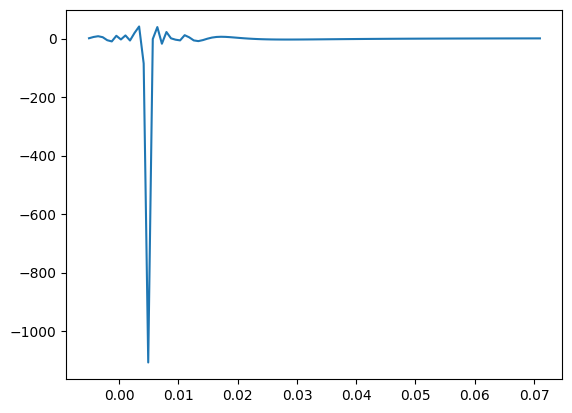

In [155]:
x=9
L=4.5 
m=np.linspace(-.0051,.071,100,.0005)
c=np.abs(r.w[1])
sup=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
plt.plot(m,sup)

In Quantum theory these suppressions are of the nature pi-orbitals.

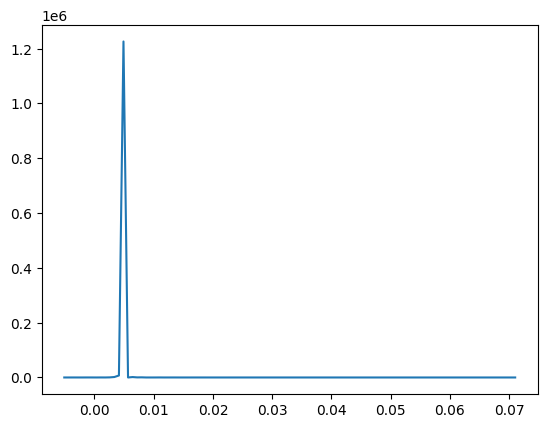

In [156]:
plt.plot(m,sup**2)

In [157]:
print(df.Close.describe()[1])

1.3120913669980805


Text(0.5, 1.0, 'How long it would take for minium to be attained')

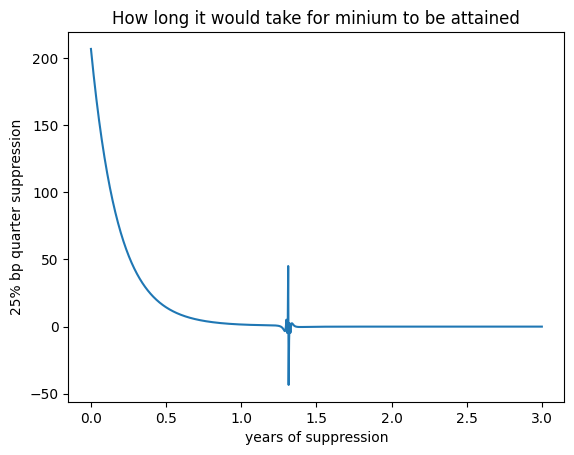

In [158]:
x=9
L=4.5
t=np.linspace(-.0,3,1000) 
m=(r.w[0])*np.mean(y_hat[0,:])
c=t
sup=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
plt.plot(t,sup)
plt.xlabel('years of suppression')
plt.ylabel('25% bp quarter suppression')
plt.title('How long it would take for minium to be attained')


In [161]:
import scipy
scipy.fft.dst(np.array([np.min(sup),np.mean(sup)]))

array([ -43.15351088, -112.66066857])

In [162]:
x=9
L=4.5 
m=(r.w[0])*np.mean(y_hat[0,:])
c=.25*t[sup==np.min(sup)]*4
supcor=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
supcor

array([-43.42223723])

Where a soft landing is attained if condition are the same between 1 and 1 a half year

In [163]:
float(t[sup==np.min(sup)])

1.3153153153153152

Estimated cost of South African Covid variant and similar behavior if 25 basis points is about 4.25 % of British Economy according to https://www.hellenicshippingnews.com/bank-of-england-to-lift-bank-rate-25-basis-points-to-4-25-in-march-then-pause-reuters-poll/ and what the British Economy was worth in 2020:

In [164]:
float(t[sup==np.min(sup)])*4.25/100*4*2217

495.7291891891892

### Is about a minimum £ 495.7 Billion

### Here is the general suppression

In [165]:
x=9
L=4.5 
m=1.25
c=.25*1*4
sup=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
sup

1.2927134581001924

### Where this equation can be use else where

These are Older MCAT numbers

In [166]:
x=9
L=3.7 
m=0
c=1/100000
sup=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
sup

4391.400207264565

These are LSAT numbers

In [167]:
x=3*360
L=150 
m=0
c=1/100000
sup=np.cos(L/(2*np.pi*(m-c)*x))*(np.exp(np.pi*x*(m-c)/L))/(4.5*np.pi*(m-c))
sup

-2589.5312104675427